In [202]:
#Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [204]:
#Open final data file
final_data = pd.read_csv('final-data-lime.csv', low_memory=False)
final_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenDate,DiffTimeMonths,PromoDate,DiffPromoTimeMonths
0,1,5,31/07/2015,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
1,1,6,12/01/2013,4952,646,1,0,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
2,1,5,03/01/2014,4190,552,1,0,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
3,1,3,03/12/2014,6454,695,1,1,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
4,1,3,13/11/2013,3310,464,1,0,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0


In [207]:
#Convert date to date time
final_data['Date'] = pd.to_datetime(final_data['Date'], dayfirst=True)
final_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenDate,DiffTimeMonths,PromoDate,DiffPromoTimeMonths
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
1,1,6,2013-01-12,4952,646,1,0,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
2,1,5,2014-01-03,4190,552,1,0,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
3,1,3,2014-12-03,6454,695,1,1,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0
4,1,3,2013-11-13,3310,464,1,0,0,0,c,...,9.0,2008.0,0,NaN,NaN,NaN,2008-09-01,82,NaN,0


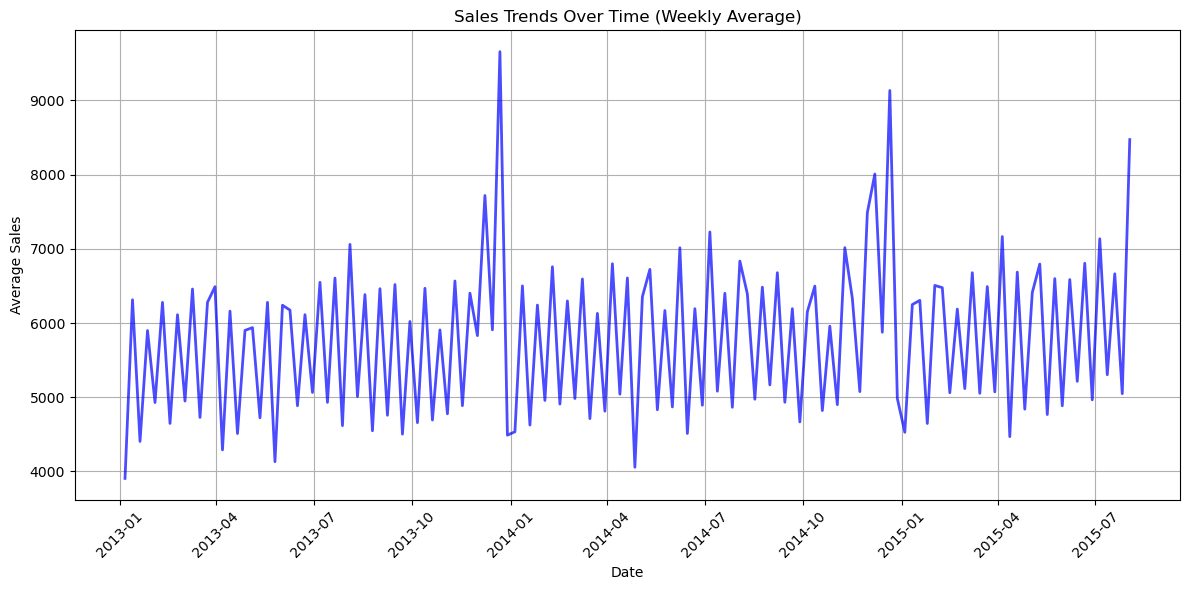

In [209]:
#1: Plot sales trends over time
#1a: by week

# Set rcParams to handle Agg overflow error
mpl.rcParams['agg.path.chunksize'] = 10000

# Resample sales data to get weekly average for a clearer visualization
final_data.set_index('Date', inplace=True)
weekly_sales = final_data['Sales'].resample('W').mean()

# Plot sales trends over time with weekly averages
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales.index, weekly_sales.values, color='blue', alpha=0.7, linewidth=2)
plt.title('Sales Trends Over Time (Weekly Average)')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



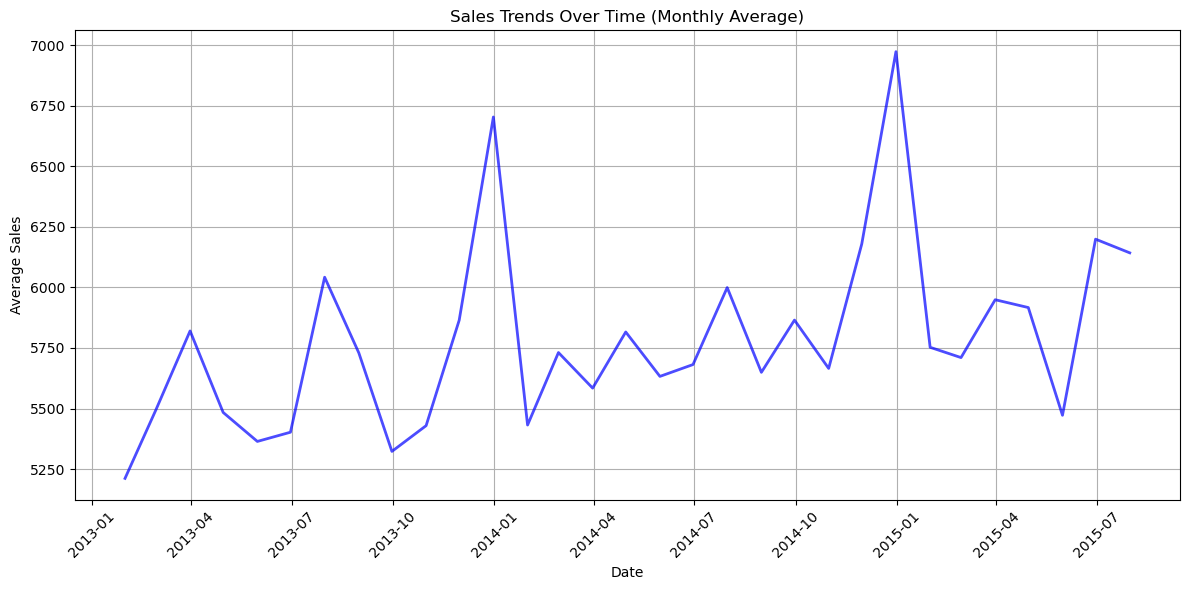

In [131]:
# 1b: per month
monthly_sales = final_data['Sales'].resample('ME').mean()

# Plot sales trends over time with monthly averages
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, color='blue', alpha=0.7, linewidth=2)
plt.title('Sales Trends Over Time (Monthly Average)')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


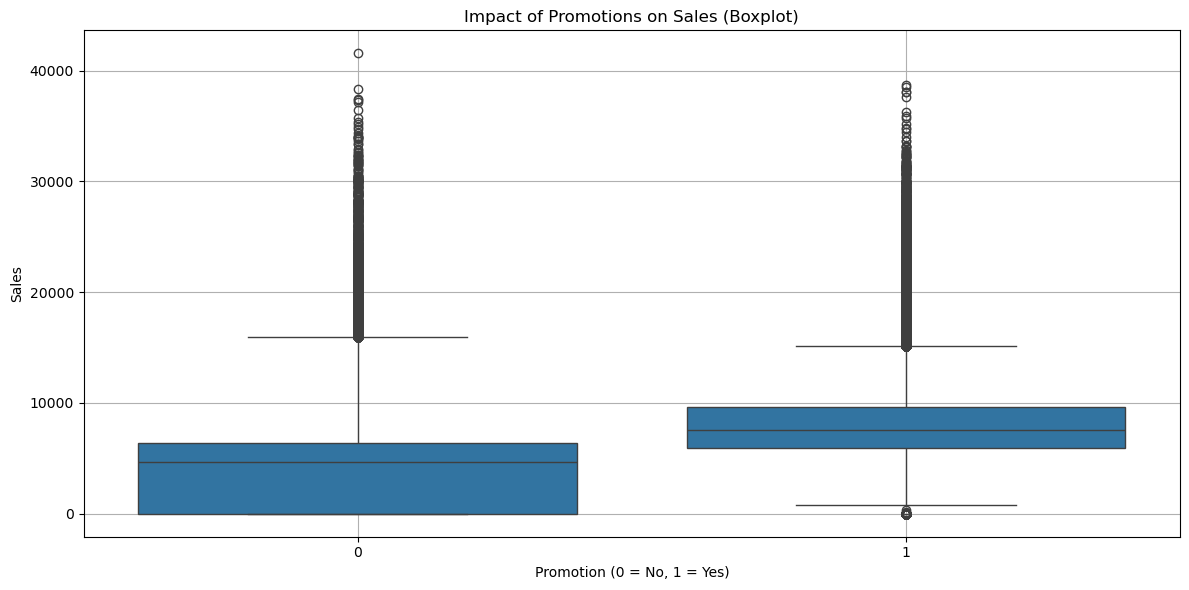

In [213]:
#Visualisation for the impact of promotions on sales
#2a: boxplot of impact of promotions on sales

plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='Promo', y='Sales')
plt.title('Impact of Promotions on Sales (Boxplot)')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

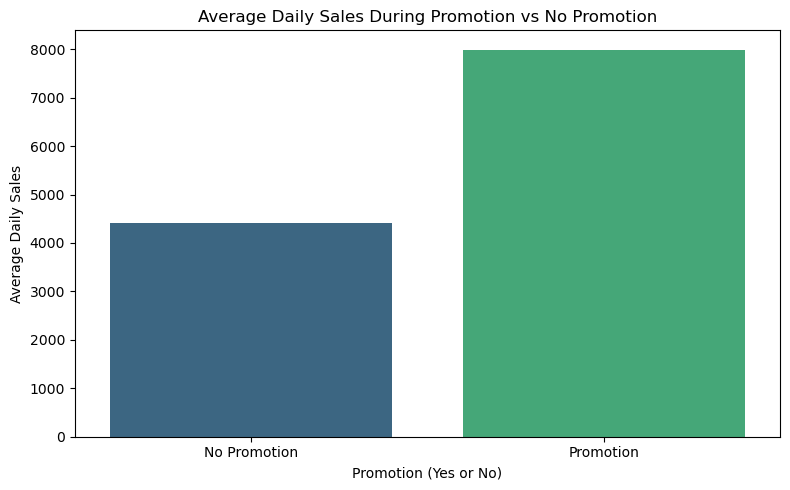

In [215]:
# 2b: Average sales during promotion and non-promotion periods
avg_sales = final_data.groupby('Promo')['Sales'].mean().reset_index()
avg_sales['Promo'] = avg_sales['Promo'].map({0: 'No Promotion', 1: 'Promotion'})
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sales, x='Promo', y='Sales', hue='Promo', dodge=False, palette='viridis', legend=False)
plt.title('Average Daily Sales During Promotion vs No Promotion')
plt.xlabel('Promotion (Yes or No)')
plt.ylabel('Average Daily Sales')
plt.tight_layout()
plt.show()

Debug: Entries per StateHoliday type before averaging:
StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64
Debug: Average sales by holiday type after grouping:
  StateHoliday        Sales
0            0  5947.483893
1            a   290.735686
2            b   214.311510
3            c   168.733171
Debug: Merged average sales by holiday type before filling NaNs:
     StateHoliday        Sales
0      No Holiday  5947.483893
1  Public Holiday   290.735686
2  Easter Holiday   214.311510
3       Christmas   168.733171


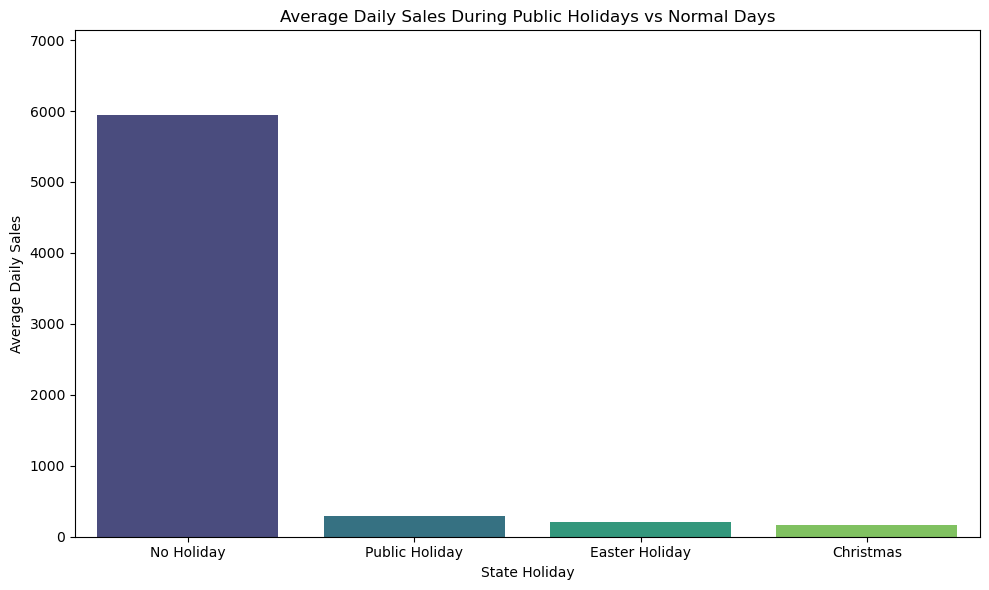

Debug: Final avg_sales_holiday for visualization:
     StateHoliday        Sales
0      No Holiday  5947.483893
1  Public Holiday   290.735686
2  Easter Holiday   214.311510
3       Christmas   168.733171


In [217]:
#3: Average sales during public holidays vs normal days
# Debug: Verify if StateHoliday data is preserved before averaging
print("Debug: Entries per StateHoliday type before averaging:")
print(final_data['StateHoliday'].value_counts())

# Calculate the average sales for each holiday type using original StateHoliday values
avg_sales_holiday = final_data.groupby('StateHoliday')['Sales'].mean().reset_index()
print("Debug: Average sales by holiday type after grouping:")
print(avg_sales_holiday)

# Replace original StateHoliday values with descriptive labels for visualization
avg_sales_holiday['StateHoliday'] = avg_sales_holiday['StateHoliday'].replace({'0': 'No Holiday', 'a': 'Public Holiday', 'b': 'Easter Holiday', 'c': 'Christmas'})

# Ensure that all holidays have corresponding entries by using consistent labels
all_holidays_df = pd.DataFrame({'StateHoliday': ['No Holiday', 'Public Holiday', 'Easter Holiday', 'Christmas']})
avg_sales_holiday = pd.merge(all_holidays_df, avg_sales_holiday, on='StateHoliday', how='left', sort=False)

# Debug: Verify merged data before filling missing values
print("Debug: Merged average sales by holiday type before filling NaNs:")
print(avg_sales_holiday)

# Replace NaNs with 0 to indicate no data for visualization
avg_sales_holiday['Sales'] = avg_sales_holiday['Sales'].fillna(0)

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_holiday, x='StateHoliday', y='Sales', hue='StateHoliday', dodge=False, palette='viridis', legend=False)
if avg_sales_holiday['Sales'].max() > 0:
    plt.ylim(0, max(avg_sales_holiday['Sales']) * 1.2)
plt.title('Average Daily Sales During Public Holidays vs Normal Days')
plt.xlabel('State Holiday')
plt.ylabel('Average Daily Sales')
plt.tight_layout()
plt.show()

# Debug: Display final data used for visualization
print("Debug: Final avg_sales_holiday for visualization:")
print(avg_sales_holiday)

Debug: Entries per SchoolHoliday type:
SchoolHoliday
0    835488
1    181721
Name: count, dtype: int64


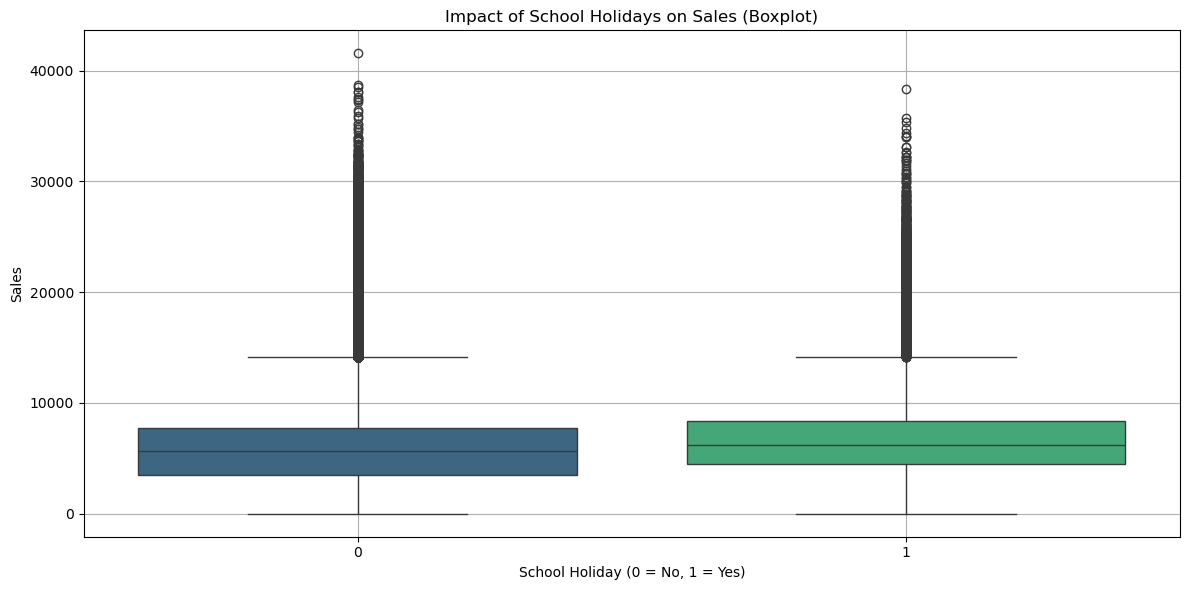

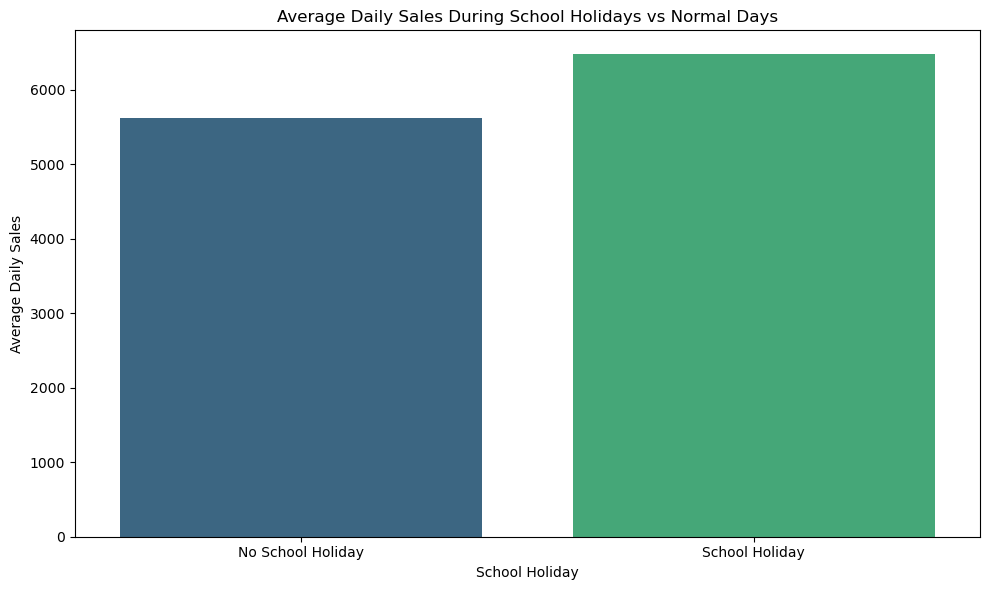

In [221]:
# 4: Impact of School Holidays on Sales
# Debug: Verify if SchoolHoliday data exists
print("Debug: Entries per SchoolHoliday type:")
print(final_data['SchoolHoliday'].value_counts())

# Plotting the impact of school holidays on sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data, x='SchoolHoliday', y='Sales', hue='SchoolHoliday', dodge=False, palette='viridis', legend=False)
plt.title('Impact of School Holidays on Sales (Boxplot)')
plt.xlabel('School Holiday (0 = No, 1 = Yes)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Average sales during school holidays vs non-school holidays
avg_sales_school_holiday = final_data.groupby('SchoolHoliday')['Sales'].mean().reset_index()
avg_sales_school_holiday['SchoolHoliday'] = avg_sales_school_holiday['SchoolHoliday'].map({0: 'No School Holiday', 1: 'School Holiday'})

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_school_holiday, x='SchoolHoliday', y='Sales', hue='SchoolHoliday', dodge=False, palette='viridis', legend=False)
plt.title('Average Daily Sales During School Holidays vs Normal Days')
plt.xlabel('School Holiday')
plt.ylabel('Average Daily Sales')
plt.tight_layout()
plt.show()


Debug: Summary of CompetitionDistance:
count    1.017209e+06
mean     5.425459e+03
std      7.705996e+03
min      2.000000e+01
25%      7.100000e+02
50%      2.330000e+03
75%      6.880000e+03
max      7.586000e+04
Name: CompetitionDistance, dtype: float64


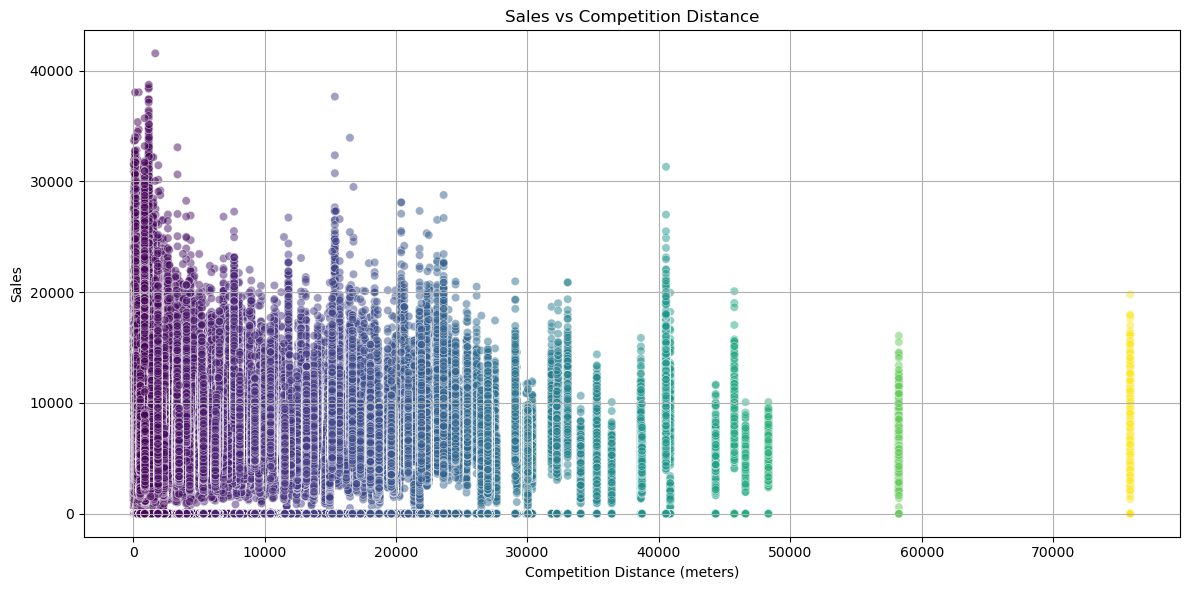

C:\Users\admin\AppData\Local\Temp\ipykernel_74904\1679939334.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_competition = final_data.groupby('CompetitionDistanceBinned')['Sales'].mean().reset_index()


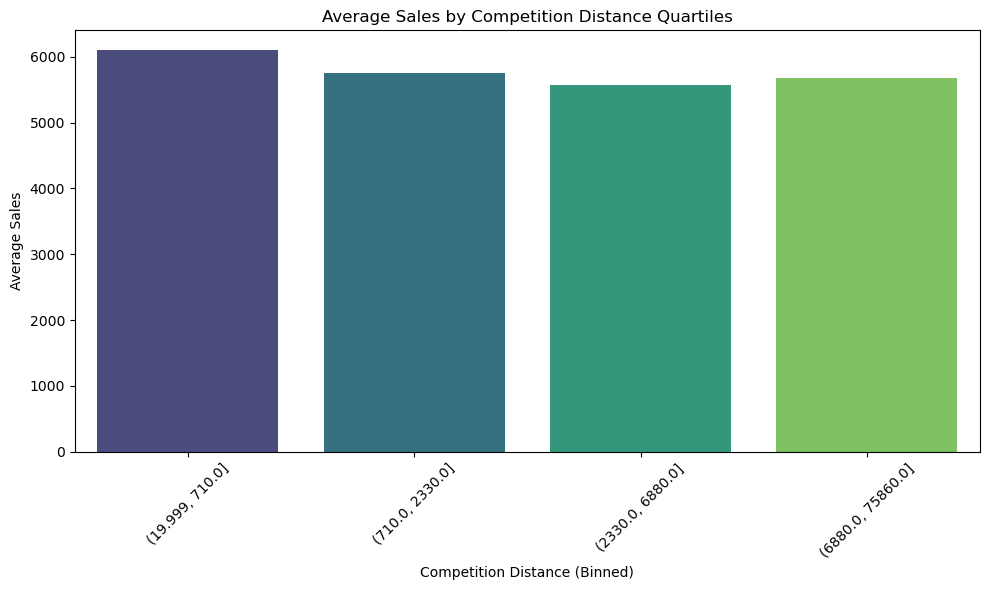

In [198]:
# 5: Sales vs Competition Distance
# Debug: Verify if CompetitionDistance data exists
print("Debug: Summary of CompetitionDistance:")
print(final_data['CompetitionDistance'].describe())

# Scatter plot to visualize the impact of competition distance on sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=final_data, x='CompetitionDistance', y='Sales', hue='CompetitionDistance', alpha=0.5, palette='viridis', legend=False)
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Binned analysis of sales by competition distance
final_data['CompetitionDistanceBinned'] = pd.qcut(final_data['CompetitionDistance'], q=4, duplicates='drop')
avg_sales_competition = final_data.groupby('CompetitionDistanceBinned')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_sales_competition, x='CompetitionDistanceBinned', y='Sales', hue='CompetitionDistanceBinned', dodge=False, palette='viridis', legend=False)
plt.title('Average Sales by Competition Distance Quartiles')
plt.xlabel('Competition Distance (Binned)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()